In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from examples import ZerodhaConnector
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
regime1 = np.random.normal(0.1, 0.1, np.random.randint(50,150,1))
regime2 = np.random.normal(-0.05, 0.2, np.random.randint(50,150,1))
regime3 = np.random.normal(0.1, 0.1, np.random.randint(50,150,1))
regime4 = np.random.normal(-0.05, 0.2, np.random.randint(50,150,1))
regime5 = np.random.normal(0.1, 0.1, np.random.randint(50,150,1))
regimes = np.concatenate((regime1, regime2, regime3, regime4, regime5))
regimes = np.reshape(regimes, (regimes.shape[0],-1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

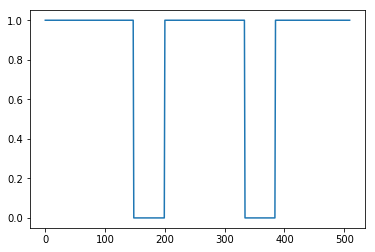

In [3]:
model = hmm.GaussianHMM(n_components=2, n_iter=10000, covariance_type="full")
model.fit(regimes)
pred = model.predict(regimes)
plt.plot(pred)
print(pred)

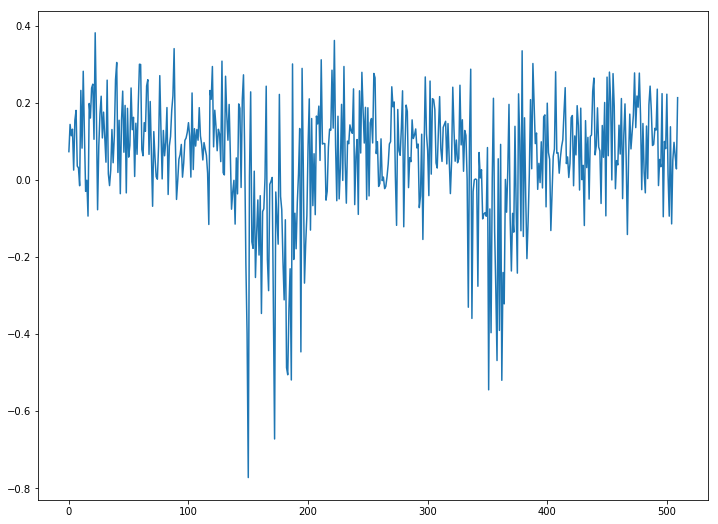

In [4]:
plt.figure(figsize=(12,9))
plt.plot(regimes)

In [5]:
def get_pricing(csv = '../data/INFY.csv'):
    df = pd.read_csv(csv, index_col = 'Date', parse_dates=True)
    cl = pd.DataFrame(df['Close'])
    cl['logClose'] = np.log(cl['Close'])
    cl['diffLogClose'] = cl['logClose'] - cl['logClose'].shift(1)
    cl['pctChange'] = cl['Close'].pct_change()
    cl = cl.dropna()
    return cl

0.0003462946734825456
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

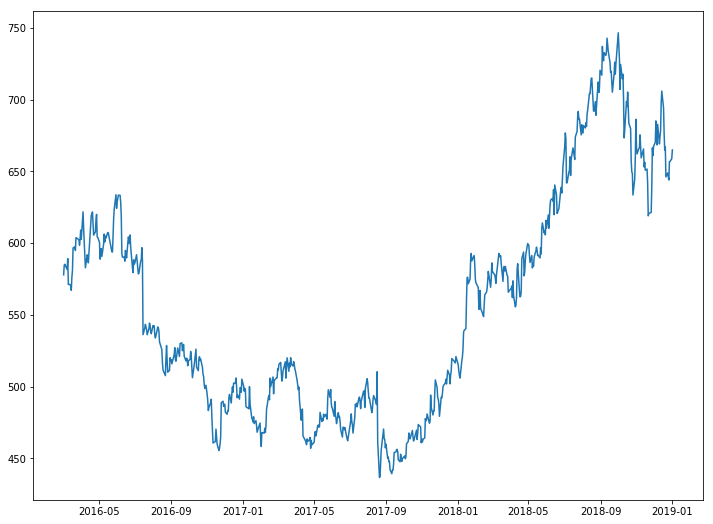

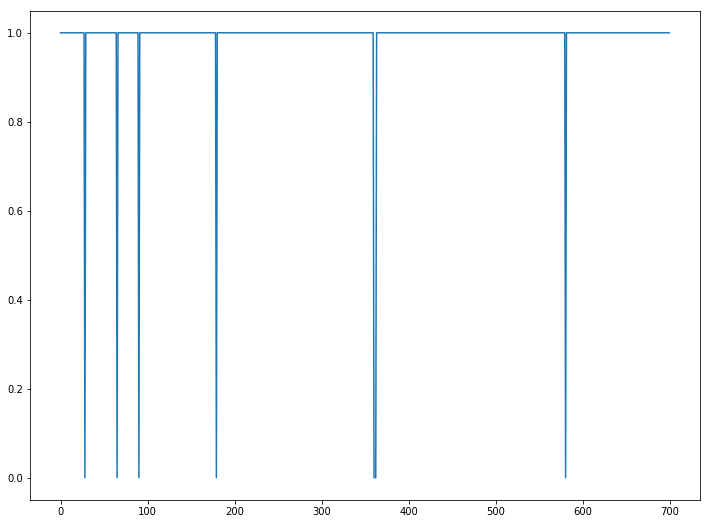

In [9]:
infy = get_pricing(csv='/Users/sujogale/qstrader/data/INFY.csv')
ret = infy['pctChange']
ret = np.reshape(ret.values, (ret.shape[0],-1))
model = hmm.GaussianHMM(n_components=2, n_iter=4000, covariance_type="diag")
test_size = 700
model.fit(ret[:-test_size])
pred = model.predict(ret[-test_size:])

plt.figure(1,figsize=(12,9))
print(infy['pctChange'][-test_size:].mean())
plt.plot(infy['Close'][-test_size:])


plt.figure(2,figsize=(12,9))
plt.plot(pred)
print(pred)
print(model.transmat_)